<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Mini Project4 - Clustering</h3>
</div>

<img src = "https://miro.medium.com/max/5760/1*_SRbz8535-CxPzo6IL9pBA.png" width=80%>

## Importing the libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

## Load and Prepare Data

In [2]:
customer = pd.read_csv("Mall_Customers.csv")
vs = customer.copy()

In [3]:
len(customer)

200

In [4]:
type(customer)

pandas.core.frame.DataFrame

## EDA

In [5]:
customer

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
customer.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [8]:
customer.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
166,167,Male,42,86,20
199,200,Male,30,137,83
83,84,Female,46,54,44
113,114,Male,19,64,46
82,83,Male,67,54,41
195,196,Female,35,120,79
171,172,Male,28,87,75
24,25,Female,54,28,14
43,44,Female,31,39,61
6,7,Female,35,18,6


In [9]:
customer.value_counts("Gender")

Gender
Female    112
Male       88
dtype: int64

In [10]:
customer.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [11]:
men = customer[customer["Gender"]=="Male"]
woman = customer[customer["Gender"]=="Female"]

In [12]:
men

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
8,9,Male,64,19,3
10,11,Male,67,19,14
14,15,Male,37,20,13
...,...,...,...,...,...
187,188,Male,28,101,68
192,193,Male,33,113,8
197,198,Male,32,126,74
198,199,Male,32,137,18


In [13]:
woman

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
...,...,...,...,...,...
191,192,Female,32,103,69
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79


In [14]:
customer.groupby(by="Gender")[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean().reset_index()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Female,38.098214,59.250000,51.526786
1,Male,39.806818,62.227273,48.511364


In [15]:
old = customer[customer["Age"]>40]
adult = customer[(customer["Age"]<40) & (customer["Age"]>25)]
young = customer[customer["Age"]<20]

In [16]:
old

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
8,9,Male,64,19,3
10,11,Male,67,19,14
12,13,Female,58,20,15
18,19,Male,52,23,29
22,23,Female,46,25,5
...,...,...,...,...,...
184,185,Female,41,99,39
186,187,Female,54,101,24
188,189,Female,41,103,17
194,195,Female,47,120,16


In [17]:
adult

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
4,5,Female,31,17,40
6,7,Female,35,18,6
9,10,Female,30,19,72
11,12,Female,35,19,99
14,15,Male,37,20,13
...,...,...,...,...,...
193,194,Female,38,113,91
195,196,Female,35,120,79
197,198,Male,32,126,74
198,199,Male,32,137,18


In [18]:
young

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
33,34,Male,18,33,92
61,62,Male,19,46,55
65,66,Male,18,48,59
68,69,Male,19,48,59
91,92,Male,18,59,41
111,112,Female,19,63,54
113,114,Male,19,64,46
114,115,Female,18,65,48
115,116,Female,19,65,50


In [19]:
old.groupby(by="Gender")[["Annual Income (k$)", "Spending Score (1-100)"]].mean().reset_index()

,Gender,Annual Income (k$),Spending Score (1-100)
0,Female,59.488372,36.813953
1,Male,57.514286,34.942857


In [20]:
adult.groupby(by="Gender")[["Annual Income (k$)", "Spending Score (1-100)"]].mean().reset_index()

,Gender,Annual Income (k$),Spending Score (1-100)
0,Female,66.108696,62.73913
1,Male,74.812500,61.71875


In [21]:
young.groupby(by="Gender")[["Annual Income (k$)", "Spending Score (1-100)"]].mean().reset_index()

,Gender,Annual Income (k$),Spending Score (1-100)
0,Female,64.333333,50.666667
1,Male,52.000000,45.111111


In [22]:
top_score = customer[customer["Spending Score (1-100)"]>70]

In [23]:
top_score

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
1,2,Male,21,15,81
3,4,Female,23,16,77
5,6,Female,22,17,76
7,8,Female,23,18,94
9,10,Female,30,19,72
11,12,Female,35,19,99
13,14,Female,24,20,77
15,16,Male,22,20,79
19,20,Female,35,23,98
21,22,Male,25,24,73


In [24]:
top_score.value_counts("Gender")

Gender
Female    32
Male      22
dtype: int64

In [25]:
adult.groupby(by="Gender")[["Age", "Annual Income (k$)"]].mean().reset_index()

,Gender,Age,Annual Income (k$)
0,Female,32.369565,66.108696
1,Male,32.750000,74.812500


## Data Preprocessing

In [26]:
customer

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [27]:
customer.drop(columns=["CustomerID"], inplace=True)

In [28]:
customer

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [29]:
customer.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [30]:
customer.dtypes

Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [31]:
Gender = customer["Gender"].values
le = LabelEncoder()
Gender = le.fit_transform(Gender)
customer["Gender"] = Gender

In [32]:
customer

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [33]:
dsc = customer[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].values

In [34]:
dsc

array([[ 19,  15,  39],
       [ 21,  15,  81],
       [ 20,  16,   6],
       [ 23,  16,  77],
       [ 31,  17,  40],
       [ 22,  17,  76],
       [ 35,  18,   6],
       [ 23,  18,  94],
       [ 64,  19,   3],
       [ 30,  19,  72],
       [ 67,  19,  14],
       [ 35,  19,  99],
       [ 58,  20,  15],
       [ 24,  20,  77],
       [ 37,  20,  13],
       [ 22,  20,  79],
       [ 35,  21,  35],
       [ 20,  21,  66],
       [ 52,  23,  29],
       [ 35,  23,  98],
       [ 35,  24,  35],
       [ 25,  24,  73],
       [ 46,  25,   5],
       [ 31,  25,  73],
       [ 54,  28,  14],
       [ 29,  28,  82],
       [ 45,  28,  32],
       [ 35,  28,  61],
       [ 40,  29,  31],
       [ 23,  29,  87],
       [ 60,  30,   4],
       [ 21,  30,  73],
       [ 53,  33,   4],
       [ 18,  33,  92],
       [ 49,  33,  14],
       [ 21,  33,  81],
       [ 42,  34,  17],
       [ 30,  34,  73],
       [ 36,  37,  26],
       [ 20,  37,  75],
       [ 65,  38,  35],
       [ 24,  38

In [35]:
sc = StandardScaler()
dsc = dsc.reshape(-1,3)
dsc = sc.fit_transform(dsc)

In [36]:
dsc

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

In [37]:
customer["Age"] = dsc[:, 0]

In [38]:
customer["Annual Income (k$)"] = dsc[:, 1]

In [39]:
customer["Spending Score (1-100)"] = dsc[:, 2]

In [40]:
customer

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,-1.424569,-1.738999,-0.434801
1,1,-1.281035,-1.738999,1.195704
2,0,-1.352802,-1.700830,-1.715913
3,0,-1.137502,-1.700830,1.040418
4,0,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,0,-0.276302,2.268791,1.118061
196,0,0.441365,2.497807,-0.861839
197,1,-0.491602,2.497807,0.923953
198,1,-0.491602,2.917671,-1.250054


## Strorytelling - Visualization

In [41]:
vs

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [42]:
vs.drop(columns="CustomerID", inplace=True)

In [43]:
vs

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


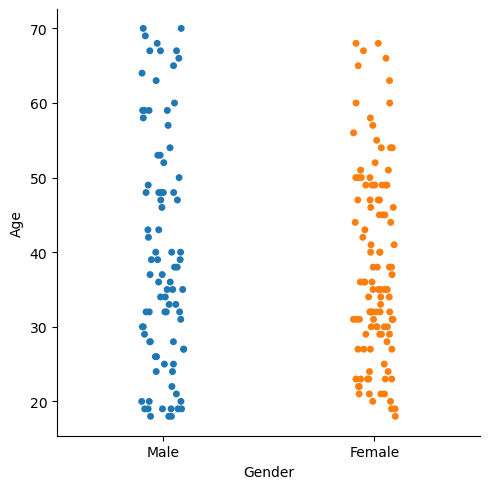

In [44]:
sns.catplot(data=vs, x="Gender", y="Age")

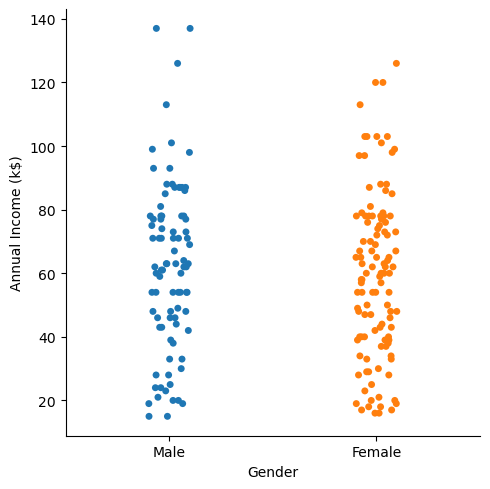

In [45]:
sns.catplot(data=vs, x="Gender", y="Annual Income (k$)")

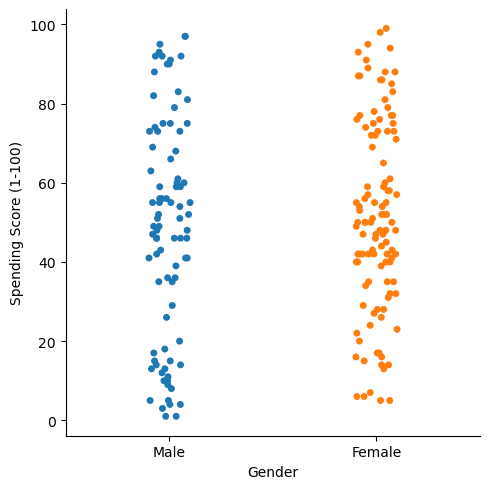

In [46]:
sns.catplot(data=vs, x="Gender", y="Spending Score (1-100)")

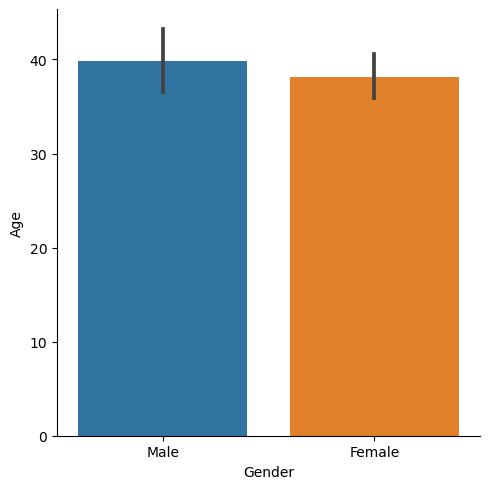

In [47]:
sns.catplot(data=vs, x="Gender", y="Age", kind="bar")

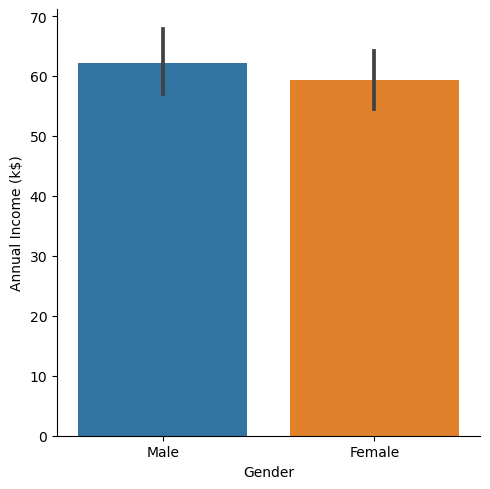

In [48]:
sns.catplot(data=vs, x="Gender", y="Annual Income (k$)", kind="bar")

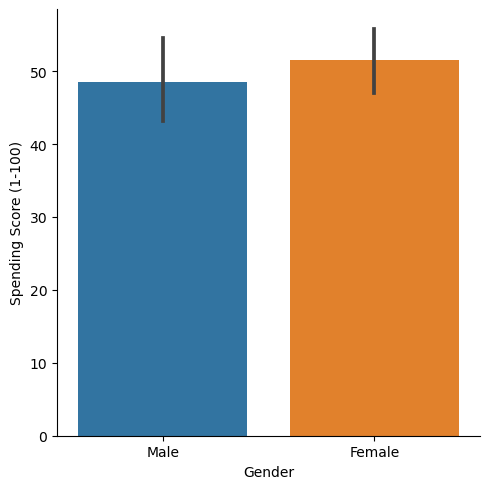

In [49]:
sns.catplot(data=vs, x="Gender", y="Spending Score (1-100)", kind="bar")

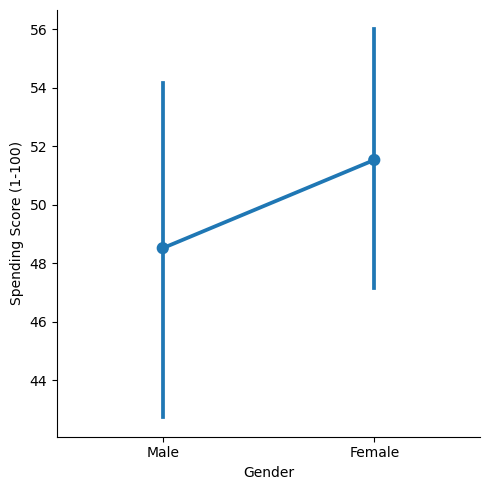

In [50]:
sns.catplot(kind="point", data=vs, x="Gender", y="Spending Score (1-100)")

## Trani the Model (Clustering)

In [51]:
X = customer[["Annual Income (k$)", "Spending Score (1-100)"]].values

In [52]:
X

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [53]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

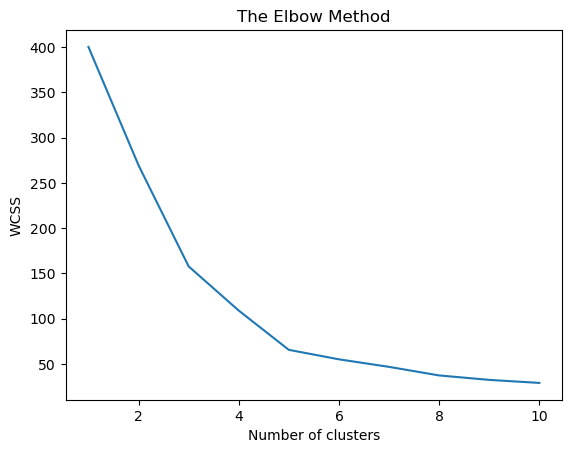

In [54]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [55]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 10)
y_kmeans = kmeans.fit_predict(X)

In [56]:
kmeans.cluster_centers_

array([[-1.32954532,  1.13217788],
       [-0.20091257, -0.02645617],
       [ 1.05500302, -1.28443907],
       [-1.30751869, -1.13696536],
       [ 0.99158305,  1.23950275]])

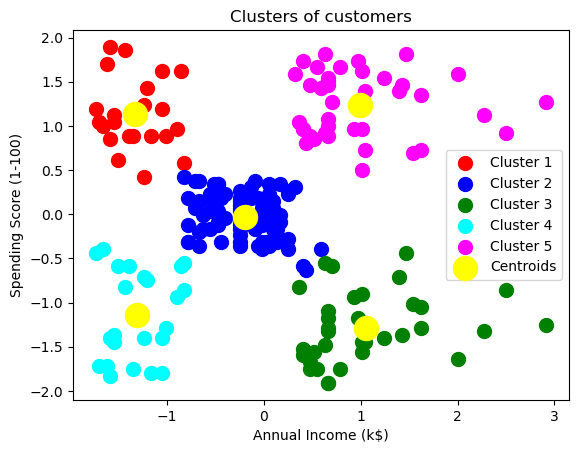

In [57]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [58]:
dbscan = DBSCAN()
dbscan.fit_predict(X)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,
        0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,
        1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,
        0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,
        1,  0,  1,  0, -1, -1,  1, -1, -1, -1, -1, -1, -1])

In [59]:
y_dbscan = dbscan.labels_

In [60]:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,
        0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,
        1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,
        0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,
        1,  0,  1,  0, -1, -1,  1, -1, -1, -1, -1, -1, -1])

In [61]:
customer["Cluster"] = y_dbscan

In [62]:
customer

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,-1.424569,-1.738999,-0.434801,0
1,1,-1.281035,-1.738999,1.195704,0
2,0,-1.352802,-1.700830,-1.715913,0
3,0,-1.137502,-1.700830,1.040418,0
4,0,-0.563369,-1.662660,-0.395980,0
...,...,...,...,...,...
195,0,-0.276302,2.268791,1.118061,-1
196,0,0.441365,2.497807,-0.861839,-1
197,1,-0.491602,2.497807,0.923953,-1
198,1,-0.491602,2.917671,-1.250054,-1


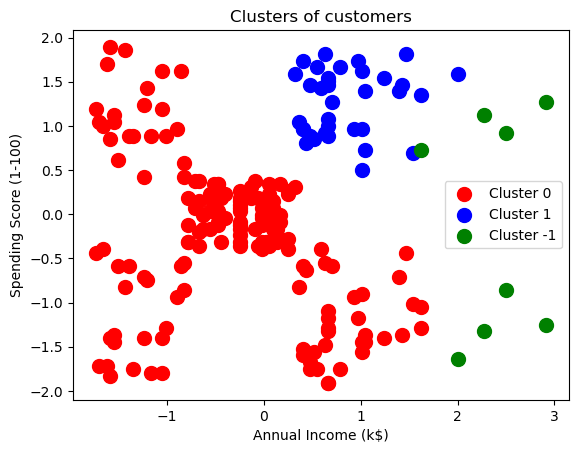

In [63]:
plt.scatter(X[y_dbscan == 0, 0], X[y_dbscan == 0, 1], s = 100, c = 'red', label = 'Cluster 0')
plt.scatter(X[y_dbscan == 1, 0], X[y_dbscan == 1, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X[y_dbscan == -1, 0], X[y_dbscan == -1, 1], s = 100, c = 'green', label = 'Cluster -1')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## Send us the Result (Maktabkhoone)